# Assignment 2: **Machine learning with tree based models** 

In this assignment, you will work on the **Titanic** dataset and use machine learning to create a model that predicts which passengers survived the **Titanic** shipwreck. 

---
## About the dataset:
---
* The column named  `Survived` is the label and the remaining columns are features. 
* The features can be described as given below:
  <table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Definition </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>pclass</td>
      <td>Ticket class	</td>
    </tr>
    <tr>
      <td>SibSp</td>
      <td>Number of siblings / spouses aboard the Titanic</td>
    </tr>
    <tr>
      <td>Parch</td>
      <td>Number of parents / children aboard the Titanic</td>
    </tr>
    <tr>
      <td>Ticket</td>
      <td>Ticket number</td>
    </tr>
    <tr>
      <td>Embarked</td>
      <td>Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton</td>
    </tr>
  </tbody>
</table> 	

---
## Instructions
---
* Apply suitable data pre-processing techniques, if needed. 
* Implement a few classifiers to create your model and compare the performance metrics by plotting the curves like roc_auc, confusion matrix, etc. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [25]:
url='https://raw.githubusercontent.com/shala2020/shala2020.github.io/master/Lecture_Materials/Assignments/MachineLearning/L2/titanic.csv'
titanic_data = pd.read_csv(url)
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
titanic_data.shape

(891, 12)

In [52]:
print(titanic_data.isna().sum())

Survived         0
PassengerId      0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin            0
Embarked         2
dtype: int64


In [0]:
from sklearn.model_selection import train_test_split , cross_validate ,StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler , LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error , confusion_matrix , f1_score , accuracy_score , roc_auc_score , roc_curve

In [0]:
cols = list(titanic_data)
cols.insert(0, cols.pop(cols.index('Survived')))
titanic_data = titanic_data.reindex(columns= cols)

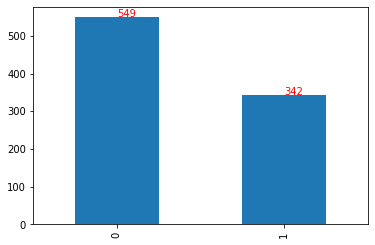

In [21]:
s = titanic_data['Survived'].value_counts()
ax=s.plot.bar() 
for i, v in s.reset_index().iterrows():
    ax.text(i, v.Survived + 1 , v.Survived, color='red')

In [51]:
titanic_data['Cabin'].fillna('NaN', inplace=True)
# titanic_data.drop(['Name'] ,inplace=True)
titanic_data_new=titanic_data.copy()
age_mean=titanic_data_new["Age"].mean()
titanic_data_new['Age'] = titanic_data_new['Age'].fillna(age_mean)
print(titanic_data.shape)
titanic_data.head()

(891, 11)


,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,1,22.0,1,0,523,7.2500,146,1
1,1,2,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,3,0,26.0,0,0,669,7.9250,146,1
3,1,4,1,0,35.0,1,0,49,53.1000,55,1
4,0,5,3,1,35.0,0,0,472,8.0500,146,1


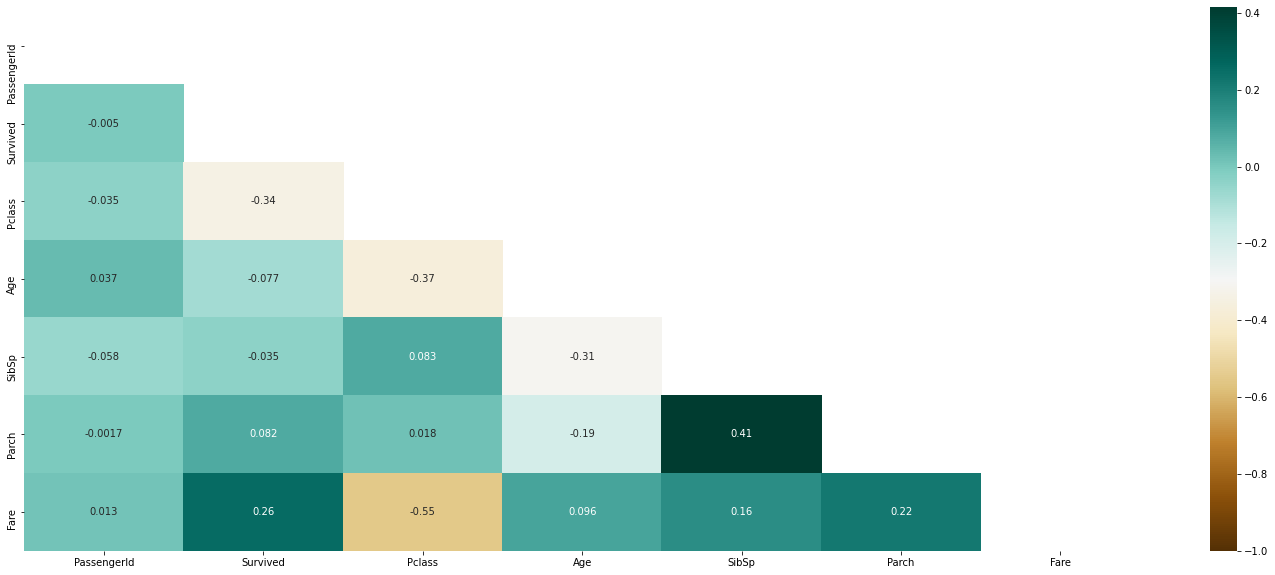

In [31]:
# To find redundant or co-related datas
fig= plt.figure(figsize=(25,10))
mask = np.zeros_like(titanic_data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(titanic_data.corr(),vmin = -1, cmap="BrBG", annot=True , mask = mask)

In [46]:
titanic_data["Embarked"]= titanic_data["Embarked"].replace('S',1)
titanic_data["Embarked"]= titanic_data["Embarked"].replace('C',0)
titanic_data.head()

,Survived,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,3,1,22.0,1,0,523,7.2500,146,1
1,1,2,1,0,38.0,1,0,596,71.2833,81,0
2,1,3,3,0,26.0,0,0,669,7.9250,146,1
3,1,4,1,0,35.0,1,0,49,53.1000,55,1
4,0,5,3,1,35.0,0,0,472,8.0500,146,1


In [47]:
#Label Encoding 
lec=LabelEncoder()
text_data=titanic_data.select_dtypes(object)
col=list(text_data.columns) 
for i in col:
  titanic_data[i] = lec.fit_transform(text_data[i])
titanic_data.head()

TypeError: ignored

In [48]:
#Feature Scaling
n=11
X=titanic_data.iloc[:,1:n+1]
Y=titanic_data.iloc[:,0]
sc_X=StandardScaler()
X = sc_X.fit_transform(X)

ValueError: ignored

In [49]:
#KNN
X1_train, X1_test,Y1_train,Y1_test= train_test_split(X,Y,random_state=1,test_size=0.15)
knnc=KNeighborsClassifier(n_neighbors=13,p=2, metric='euclidean')
knnc.fit(X1_train,Y1_train)
Y1_pred=knnc.predict(X1_test)

ValueError: ignored

In [0]:
#Testing_KNN
cm=confusion_matrix(Y1_test,Y1_pred)
print("Confusion Matrix = %s"%cm)
print('F1 Score is %s'%f1_score(Y1_test,Y1_pred))
print('Accuracy is %s'%accuracy_score(Y1_test,Y1_pred))
print('Area under ROC curve is %s'%roc_auc_score(Y1_test,Y1_pred))
fpr1,tpr1,threshold= roc_curve(Y1_test, Y1_pred)
plt.plot(fpr1, tpr1)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC curve')
plt.show()